In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bike=pd.read_csv('day.csv')
bike=bike.drop(columns=['instant','dteday'])
bike

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [4]:
bike.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

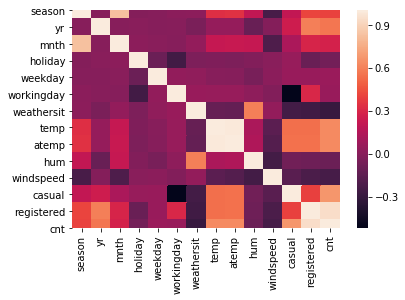

In [5]:
sns.heatmap(bike.corr())

In [ ]:
sns.pairplot(bike)

In [6]:
collist=bike.columns
ncol=16
nrows=50

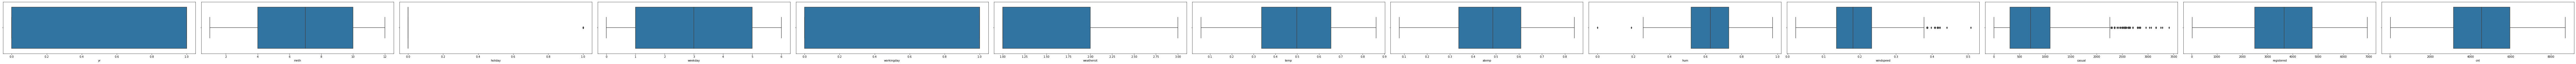

In [7]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10*ncol,10*ncol))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(bike[collist[i]])
    plt.tight_layout()

In [8]:
bike.skew()

season       -0.000384
yr           -0.002742
mnth         -0.008149
holiday       5.654224
weekday       0.002742
workingday   -0.793147
weathersit    0.957385
temp         -0.054521
atemp        -0.131088
hum          -0.069783
windspeed     0.677345
casual        1.266454
registered    0.043659
cnt          -0.047353
dtype: float64

In [9]:
from scipy.stats import zscore

dt=abs(zscore(bike))
bike_new=bike.loc[(dt<3).all(axis=1)]
print(bike.shape)
print(bike_new.shape)

(731, 14)
(700, 14)


In [10]:
bike_new.skew()

season       -0.014917
yr            0.017180
mnth         -0.013480
holiday       0.000000
weekday      -0.018876
workingday   -0.935263
weathersit    0.933362
temp         -0.056952
atemp        -0.131745
hum           0.074956
windspeed     0.633474
casual        1.144156
registered    0.056654
cnt          -0.051049
dtype: float64

In [ ]:
sns.pairplot(bike_new)

In [11]:
for i in bike_new.columns:
    if bike_new.skew().loc[i]>0.50:
        bike_new[i]=np.log(bike_new[i])
        
        
print(bike_new.skew())

season       -0.014917
yr            0.017180
mnth         -0.013480
holiday       0.000000
weekday      -0.018876
workingday   -0.935263
weathersit    0.670617
temp         -0.056952
atemp        -0.131745
hum           0.074956
windspeed    -0.565754
casual       -1.017557
registered    0.056654
cnt          -0.051049
dtype: float64


In [12]:
X=bike_new.drop(columns=['cnt','workingday','casual'])
Y=bike_new[['cnt']]
print(X.shape)
print(Y.shape)


(700, 11)
(700, 1)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,roc_curve,r2_score

In [17]:
from math import sqrt
maxrscr=0
for r in range(45,100):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=r)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    ypred=lr.predict(x_test)
    rscr=r2_score(y_test,ypred)
    if rscr>maxrscr:
        maxrscr=rscr
    final=r
print('for the randon state:',final,'max r2scr is',maxrscr)
print(lr.score(x_train,y_train))

from sklearn.model_selection import cross_val_score
print(cross_val_score(lr,X,Y,cv=5).mean())

for the randon state: 99 max r2scr is 0.9543338087549412
0.9347611635595251
0.7305798008463785


In [19]:
for r in range(45,100):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=r)
    kr=KNeighborsRegressor()
    kr.fit(x_train,y_train)
    ypred=kr.predict(x_test)
    rscr=r2_score(y_test,ypred)
    if rscr>maxrscr:
        maxrscr=rscr
    final=r
print('for the randon state:',final,'max r2scr is',maxrscr)
print(kr.score(x_train,y_train))

from sklearn.model_selection import cross_val_score
print(cross_val_score(kr,X,Y,cv=5).mean())

for the randon state: 99 max r2scr is 0.9543338087549412
0.9344669378135523
0.5513382091033968


In [21]:
from math import sqrt
for r in range(45,100):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=r)
    dct=DecisionTreeRegressor()
    dct.fit(x_train,y_train)
    ypred=dct.predict(x_test)
    rscr=r2_score(y_test,ypred)
    if rscr>maxrscr:
        maxrscr=rscr
    final=r
print('for the randon state:',final,'max r2scr is',maxrscr)
print(dct.score(x_train,y_train))

from sklearn.model_selection import cross_val_score
print(cross_val_score(dct,X,Y,cv=5).mean())

for the randon state: 99 max r2scr is 0.9712717451269073
1.0
0.4412504875015669


In [22]:
def maxscore(reg,x,y):
    max_score=0
    for r in range (45,100):
        x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=r,test_size=0.20)
        reg.fit(x_train,y_train)
        y_pred=reg.predict(x_test)
        r2scr=r2_score(y_test,y_pred)
        if r2scr>max_score:
            max_score=r2scr
            final=r
    print("max_r2score for",final,'is',max_score)

In [29]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=10)
clf.fit(X,Y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [30]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=1000)
r=maxscore(gbr,X,Y)
print('cors_val_score mean:',cross_val_score(gbr,X,Y,cv=5,scoring='r2').mean())
print('cors_val_score std:',cross_val_score(gbr,X,Y,cv=5).std())

max_r2score for 87 is 0.9888986190896211
cors_val_score mean: 0.9143323659190858
cors_val_score std: 0.04059235815384028


In [25]:
from sklearn.ensemble import AdaBoostRegressor

adb=AdaBoostRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(adb,parameters,cv=10)
clf.fit(X,Y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [28]:
adb=AdaBoostRegressor(learning_rate=0.1,n_estimators=500)
r=maxscore(adb,X,Y)
print('cors_val_score mean:',cross_val_score(adb,X,Y,cv=5).mean())
print('cors_val_score std:',cross_val_score(adb,X,Y,cv=5).std())

max_r2score for 92 is 0.9382378439271772
cors_val_score mean: 0.6319634945933996
cors_val_score std: 0.23233574969513207


In [ ]:
from sklearn.externals import joblib
joblib.dump(gbr,'Bike.pk1')